In [1]:
from google.colab import drive
import os
import pandas as pd

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/chatbot/graph/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

avg.ipynb  book_list.csv  graph.png


In [3]:
book_list = pd.read_csv('book_list.csv')
book_list.drop(['Unnamed: 0', 'review', 'rate', 'created_dt', 'modified_dt'], inplace=True, axis=1)
book_list.head()

,user_id,book_id,status
0,1,1518,0
1,1,6310,0
2,1,6469,1
3,1,6614,0
4,1,6615,0


In [4]:
book_list = book_list[book_list.status == 1]
book_list.head()

,user_id,book_id,status
2,1,6469,1
6,1,7361,1
8,1,8519,1
9,1,15327,1
12,1,19800,1


In [5]:
cnt_status = book_list['user_id'].value_counts()

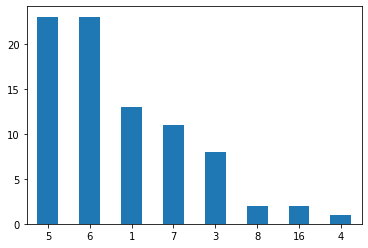

In [6]:
cnt_status.plot.bar(x='User', y='Books', rot=0)

In [7]:
users = cnt_status.index.tolist()
users

[5, 6, 1, 7, 3, 8, 16, 4]

In [8]:
values = cnt_status.tolist()
values

[23, 23, 13, 11, 8, 2, 2, 1]

In [9]:
avg = int(sum(values) / len(values))
avg

10

In [10]:
me = 1
me_values = values[users.index(me)]
if me_values > avg:
    print('평균보다 많이 읽으셨네요!')
else:
    print('평균보다 덜 읽으셨어요 분발하세요!')

평균보다 많이 읽으셨네요!


In [11]:
n_values = []
n_values.append(me_values)
n_values.append(avg)
n_values.append(max(values))
n_values

[13, 10, 23]

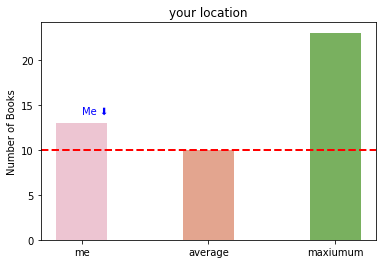

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(n_values))
labels = [None] * 3
labels[n_values.index(max(values))] = 'maxiumum'
labels[n_values.index(avg)] = 'average'
labels[n_values.index(me_values)] = 'me'

bar_colors = ['#edc5d2', '#e3a58f', '#79b05f']

plt.axhline(avg, 0, len(n_values), color='red', linestyle='--', linewidth=2)
plt.text(n_values.index(me_values), me_values+1, 'Me ⬇️️', color='blue')
plt.bar(x, n_values, align='center', tick_label=labels, width=0.4, color=bar_colors)
plt.title('your location')
plt.ylabel('Number of Books')

plt.savefig('graph.png')

plt.show()

In [13]:
ratings = pd.read_csv('watcha_ratings.csv')
ratings.head()

,isbn,username,rate,user_id,book_id
0,9791197852039,백준,7.0,4811,76044
1,9791197852039,MIN,4.0,865,76044
2,9791197852039,민지,6.0,4404,76044
3,9791197852039,ES,8.0,326,76044
4,9791197852039,귀를 기울이면,6.0,2786,76044
